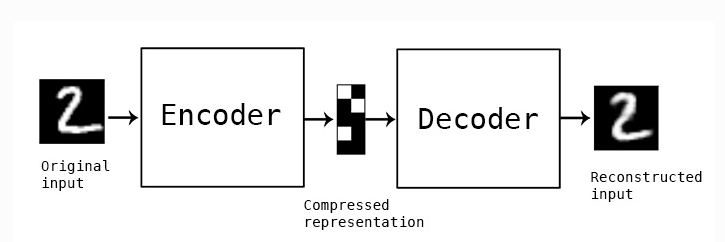

In [1]:
from IPython.display import Image
Image('/Users/MacBook/Documents/ISI/DL ISI/5_Autoencoder/autoencoder.PNG')

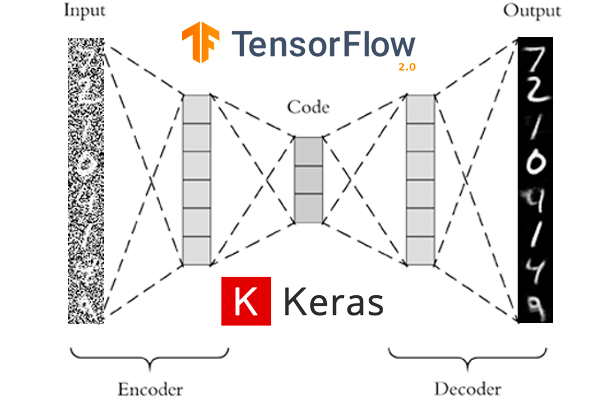

In [2]:
Image('/Users/MacBook/Documents/ISI/DL ISI/5_Autoencoder/architecture.png')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

## Autoencoder

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
from tensorflow import keras
from tensorflow.keras import layers, Input, Model

In [6]:
# size of encoded represntations
encoding_dim = 32

In [7]:
# size of input image
input_img = Input(shape=(784,))
# 'encode' is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# 'decoded' is the reconstruction of the input
decoded = layers.Dense(784, activation = 'sigmoid')(encoded)

Metal device set to: Apple M2 Pro


2024-04-27 12:04:45.118891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-27 12:04:45.119292: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# Model maps an input image to reconstructed image
autoencoder = Model(input_img, decoded)

In [9]:
encoder = Model(input_img, encoded)

In [10]:
# encoded (32-dim) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the alst layer of teh autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [11]:
# Compile
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Import MNIST dataset
from tensorflow.keras.datasets import mnist
import numpy as np
(X_train, _), (X_test, _) = mnist.load_data()

In [14]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
X_train = X_train.astype('float32') /255
X_test = X_test.astype('float32') /255
X_train = X_train.reshape(len(X_train),784)
X_test = X_test.reshape(len(X_test),784)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [16]:
# fit autoencoder model to the train set
autoencoder.fit(X_train,X_train, epochs=100,batch_size=256,shuffle =True,
               validation_data = (X_test,X_test))

Epoch 1/100


2024-04-27 12:04:52.352822: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-04-27 12:04:52.468637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must

 10/235 [>.............................] - ETA: 1s - loss: 0.6738  

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerform

235/235 [==============================] - ETA: 0s - loss: 0.2741

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - 2s 7ms/step - loss: 0.2741 - val_loss: 0.1895
Epoch 2/100
 33/235 [===>..........................] - ETA: 0s - loss: 0.1878

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x784xi1>'


235/235 [==============================] - 1s 5ms/step - loss: 0.1716 - val_loss: 0.1547
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1449 - val_loss: 0.1343
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1290 - val_loss: 0.1220
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1186 - val_loss: 0.1133
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1115 - val_loss: 0.1074
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1063 - val_loss: 0.1031
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1025 - val_loss: 0.1000
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0997 - val_loss: 0.0974
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0977 - val_loss: 0.0957
Epoch 11/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0964 - val_loss: 0.0945


In [17]:
# encode and decode some digits
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

194/313 [=================>............] - ETA: 0s

2024-04-27 12:06:54.639369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


205/313 [==================>...........] - ETA: 0s

2024-04-27 12:06:54.951538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 768us/step


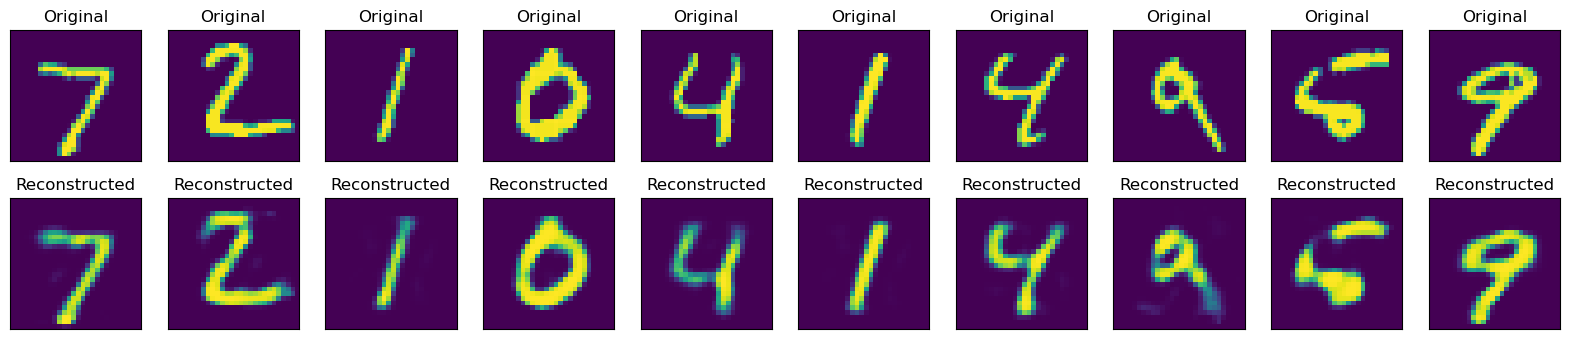

In [18]:
# Visualization
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2,n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title('Reconstructed')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Deep autoencoder

In [19]:
input_img = Input(shape=(784,))

encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation = 'relu')(encoded)
decoded = layers.Dense(128, activation = 'relu')(decoded)
decoded = layers.Dense(784, activation = 'sigmoid')(decoded)

In [20]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 784)               1011

In [21]:
autoencoder.fit(X_train,X_train, epochs=100,batch_size=256,shuffle =True,
               validation_data = (X_test,X_test))

Epoch 1/100


2024-04-27 12:06:56.035583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x256x1x784xi1

235/235 [==============================] - ETA: 0s - loss: 0.2407

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - 2s 9ms/step - loss: 0.2407 - val_loss: 0.1677
Epoch 2/100
 25/235 [==>...........................] - ETA: 1s - loss: 0.1659

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x16x1x784xi1>'


235/235 [==============================] - 2s 7ms/step - loss: 0.1473 - val_loss: 0.1318
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1271 - val_loss: 0.1214
Epoch 4/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1196 - val_loss: 0.1154
Epoch 5/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1148 - val_loss: 0.1112
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1110 - val_loss: 0.1082
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1079 - val_loss: 0.1054
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1054 - val_loss: 0.1030
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1035 - val_loss: 0.1016
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1018 - val_loss: 0.0997
Epoch 11/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1002 - val_loss: 0.0984


In [22]:
decoded_imgs = autoencoder.predict(X_test)

 69/313 [=====>........................] - ETA: 0s

2024-04-27 12:09:45.802853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


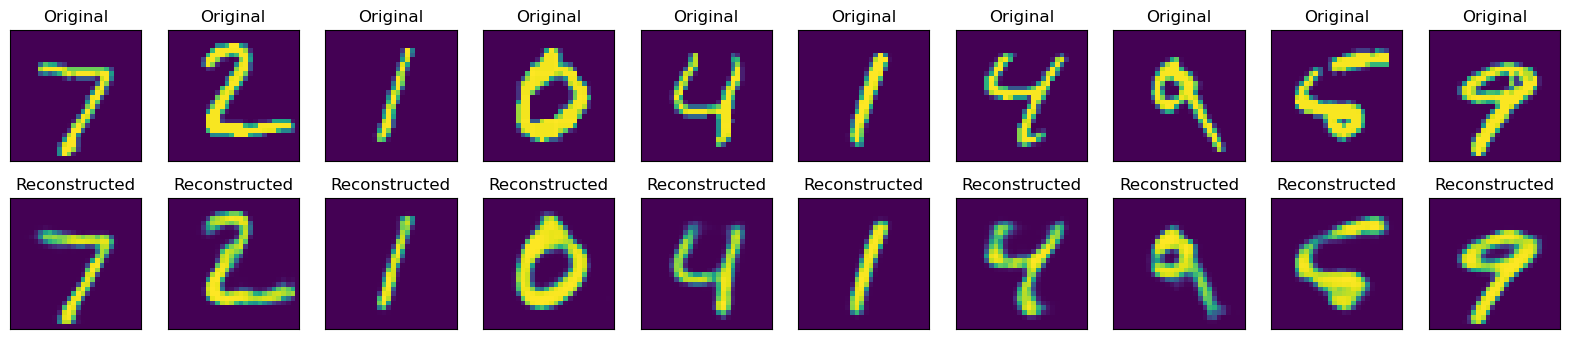

In [23]:
# Visualization
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2,n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title('Reconstructed')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Convolutional autoencoder and application to image denoising

In [5]:
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [6]:
X_train = np.reshape(X_train, (len(X_train), 28,28,1))
X_test = np.reshape(X_test, (len(X_test), 28,28,1))
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [16]:
noise_factor = 0.5
X_train_noise = X_train + noise_factor * np.random.normal(loc=0.0, scale = 1.0,
                                                         size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc=0.0, scale = 1.0,
                                                         size = X_test.shape)

In [17]:
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

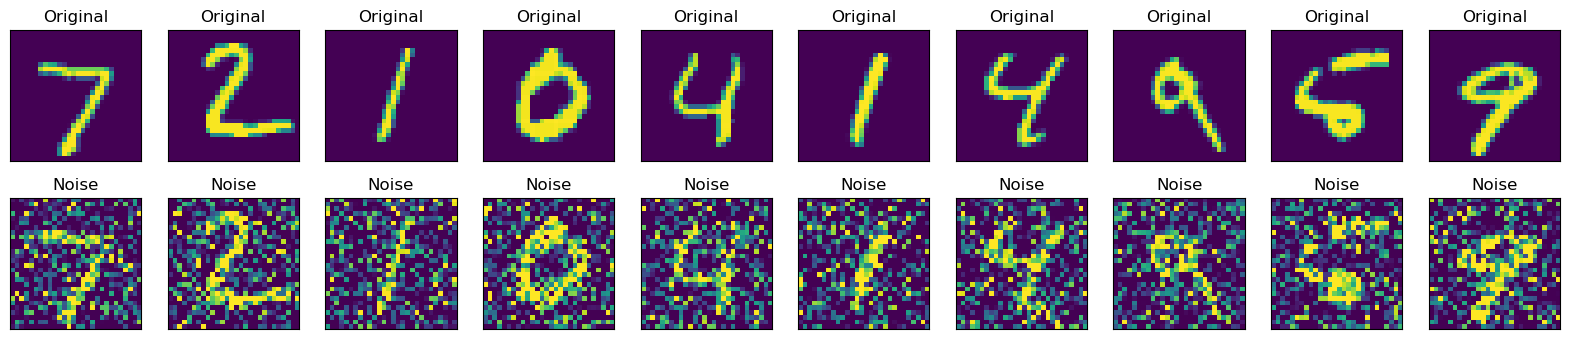

In [18]:
# Visualization
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display original
    ax = plt.subplot(2,n, i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.title('Original')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display with noise
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(X_test_noise[i].reshape(28,28))
    plt.title('Noise')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [29]:
input_img = Input(shape=(28,28,1))

x = layers.Conv2D(32,(3,3), activation='relu',padding = 'same')(input_img)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Conv2D(32,(3,3), activation='relu',padding = 'same')(x)
x = layers.MaxPooling2D((2,2))(x)

# (7,7,32) representation at this point

x = layers.Conv2D(32,(3,3), activation='relu',padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(32,(3,3), activation='relu',padding = 'same')(x)
x = layers.UpSampling2D((2,2))(x)
decoded = layers.Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [30]:
convAE = Model(input_img, decoded)
convAE.compile(optimizer='adam', loss='binary_crossentropy')
convAE.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [31]:
convAE.fit(X_train_noise, X_train, epochs = 20, batch_size = 256, shuffle = True,
          validation_data = (X_test_noise, X_test))

Epoch 1/20


2024-04-27 12:09:48.462605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<256x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<256x28x28x1xi1

235/235 [==============================] - ETA: 0s - loss: 0.2070

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<96x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<96x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerforman

235/235 [==============================] - 10s 35ms/step - loss: 0.2070 - val_loss: 0.1252
Epoch 2/20
  5/235 [..............................] - ETA: 6s - loss: 0.1244

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x28x28x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<16x28x28x1xi1>'


235/235 [==============================] - 8s 32ms/step - loss: 0.1190 - val_loss: 0.1134
Epoch 3/20
235/235 [==============================] - 8s 33ms/step - loss: 0.1126 - val_loss: 0.1091
Epoch 4/20
235/235 [==============================] - 8s 33ms/step - loss: 0.1089 - val_loss: 0.1062
Epoch 5/20
235/235 [==============================] - 8s 36ms/step - loss: 0.1065 - val_loss: 0.1050
Epoch 6/20
235/235 [==============================] - 8s 36ms/step - loss: 0.1050 - val_loss: 0.1038
Epoch 7/20
235/235 [==============================] - 8s 36ms/step - loss: 0.1038 - val_loss: 0.1023
Epoch 8/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1029 - val_loss: 0.1014
Epoch 9/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1020 - val_loss: 0.1007
Epoch 10/20
235/235 [==============================] - 8s 35ms/step - loss: 0.1012 - val_loss: 0.0998
Epoch 11/20
235/235 [==============================] - 8s 34ms/step - loss: 0.1005 - val_loss: 0.0991

In [32]:
# econde and decode some digits
decoded_imgs = convAE.predict(X_test_noise)

 11/313 [>.............................] - ETA: 1s 

2024-04-27 12:12:38.647675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


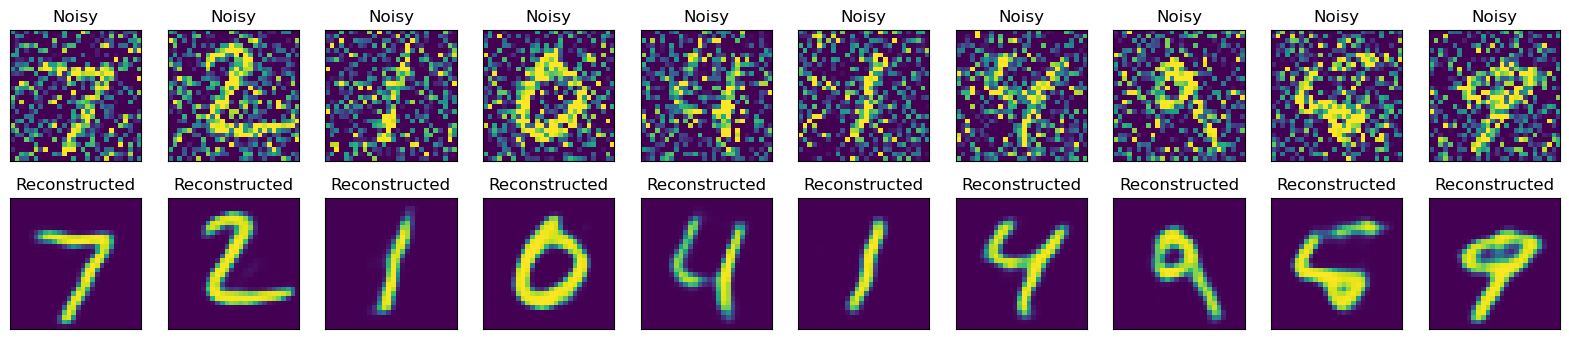

In [33]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    # Display with noise
    ax = plt.subplot(2,n, i+1)
    plt.imshow(X_test_noise[i].reshape(28,28))
    plt.title('Noisy')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.title('Reconstructed')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)